In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

2019-01-14 12:28:57,163 [5823] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
def build_df(dirname, filename):
    filepath = os.path.join(dirname, filename)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel',  '--svhn',
       '--tensorboard', '--validation-size'
       , 'deepstrom','dense', 
                     "--non-linear", "--non-linearity", "--num-epoch",
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)
    return df


In [11]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_deepstrom_svhn_after_grid/"
FILENAME = "gathered_results.csv"
df_deepstrom_grid = build_df(DIRNAME, FILENAME)

--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size --out-dim  --seed  --tanh-activation dataset  kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
0             64        1.0    None           0.0001            True           8      None       3              False    svhn  linear  deepstrom  0.869766        7.722365  15544.896883          None  0.880909       3.782583      1547249755
1             64        1.0    None           0.0001            True          32      None       4              False    svhn  linear  deepstrom  0.945582        8.764329  15700.696393          None  0.941006       4.143410      1547265386
2             64        1.0    None           0.0001            True          16      None       2              False    svhn  linear  deepstrom  0.933536       21.563688  36325.836807          None  0.931290       8.891254      1547244474
3             64        1.0    None           0.0001            True          64      None       1              False    svhn  linear  deepstrom  0.948969       28.636179  43173.193666          None  0.944812      11.583197      1547239493
4             64        1.0    0.05           0.0001           False          64      None       0              False    svhn     rbf  deepstrom  0.953587       10.042351  17293.309402          None  0.949619       4.589773      1547278055
5             64        1.0    0.05           0.0001           False          32      None       2              False    svhn     rbf  deepstrom  0.954126        9.639740  16469.543394          None  0.944511       4.482450      1547289073
6             64        1.0    None           0.0001            True          32      None       2              False    svhn  linear  deepstrom  0.952163       24.391145  39192.336846          None  0.946514       9.966383      1547244532
7             64        1.0    None           0.0001            True         128      None       4              False    svhn  linear  deepstrom  0.948083       38.948359  53782.520961          None  0.943910      15.519753      1547273491
8             64        1.0    0.05           0.0001           False           8      None       0              False    svhn     rbf  deepstrom  0.195813        8.046527  15442.132190          None  0.184195       3.828005      1547273602
9             64        1.0    0.05           0.0001           False          64      None       1              False    svhn     rbf  deepstrom  0.955665        9.936177  17226.698167          None  0.948818       4.622451      1547281127
10            64        1.0    0.05           0.0001           False         128      None       0              False    svhn     rbf  deepstrom  0.953087       13.151883  19299.816241          None  0.949319       5.818645      1547279443
11            64        1.0    None           0.0001            True          64      None       0              False    svhn  linear  deepstrom  0.951817       18.703904  21939.990093          None  0.947416       7.207749      1547236815
12            64        1.0    None           0.0001            True         128      None       0              False    svhn  linear  deepstrom  0.950470       36.829016  55386.730543          None  0.950721      15.405296      1547237331
13            64        1.0    None           0.0001            True           8      None       2              False    svhn  linear  deepstrom  0.756696       20.310525  35758.940898          None  0.763221       8.459663      1547243928
14            64        1.0    None           0.0001            True           8      None       0              False    svhn  linear  deepstrom  0.374115        7.880274  14738.356462          None  0.370192       3.874336      1547233313
15            64        1.0    0.05           0.0001           False          64      None       3              False    svhn     rbf  deepstrom  0.953548        9.

In [12]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_deepstrom_mnist_svhn/"
FILENAME = "gathered_results.csv"
df_deepstrom = build_df(DIRNAME, FILENAME)
df_deepstrom = df_deepstrom[df_deepstrom["dataset"] == "svhn"]

In [13]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_dense_mnist_svhn/"
FILENAME = "gathered_results.csv"
df_dense = build_df(DIRNAME, FILENAME)
df_dense = df_dense[df_dense["dataset"] == "svhn"]

In [14]:
def get_sorted_acc_for_dataset(df_, name):
    df_dataset = df_[df_["dataset"] == name]
    df_dataset = df_dataset.sort_values(by="val_acc", ascending=False)
    return df_dataset

In [23]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

min_acc = 0.5
max_acc = 1.1
DATANAME = "svhn"

In [24]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

In [32]:
def create_figure_from_df_deepstrom(df_deeps, df_dense, name_fig):
    kernel_names = set(df_deeps["kernel"].values)
    nys_size = set(df_deeps["--nys-size"].values)
    gamma_values = set(df_deeps["--gamma"].values)
    gamma_values.remove("None")

    logger.debug("Nystrom possible sizes are: {}".format(nys_size))
    logger.debug("Kernel functions are: {}".format(kernel_names))
    display(df_deeps)
    df_data = df_deeps
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        df_kernel = df_kernel.sort_values(by=["--nys-size"])
        if k_name == "rbf":
            for g_val in gamma_values:
                k_name = "rbf" + "_" + str(g_val)
                df_rbf = df_kernel[df_kernel["--gamma"] == g_val]
                display(df_rbf)
                accuracies_kernel_mean = np.mean(
        np.array([list(df_rbf[df_rbf["--seed"] == seed_v]["test_acc"]) for seed_v in
                  range(5)]), axis=0)
                
                accuracies_kernel_std = np.std(
        np.array([list(df_rbf[df_rbf["--seed"] == seed_v]["test_acc"]) for seed_v in
                  range(5)]), axis=0)
                
                subsample_sizes_kernel = np.array(sorted([int(n) for n in np.unique(df_rbf["--nys-size"])]))
                np_param = (np.square(subsample_sizes_kernel) +  # m x m
                            subsample_sizes_kernel * nb_classes_dataset)  # m x c
                                
                xx = np_param
                yy = accuracies_kernel_mean.astype(float)
                ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
        else:
            accuracies_kernel_mean = np.mean(
        np.array([list(df_kernel[df_kernel["--seed"] == seed_v]["test_acc"]) for seed_v in
                  range(5)]), axis=0)
            
            accuracies_kernel_std = np.std(
        np.array([list(df_kernel[df_kernel["--seed"] == seed_v]["test_acc"]) for seed_v in
                  range(5)]), axis=0)

            subsample_sizes_kernel = np.array(sorted([int(n) for n in np.unique(df_kernel["--nys-size"])]))
            
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c

            xx = np_param
            yy = accuracies_kernel_mean.astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")

    df_dense["--out-dim"] = df_dense["--out-dim"].astype(np.int)
    df_dense = df_dense.sort_values(by=["--out-dim"])
    accuracies_dense_mean = np.mean(
        np.array([list(df_dense[df_dense["--seed"] == seed_v]["test_acc"]) for seed_v in
                  range(5)]), axis=0)
    accuracies_dense_std = np.std(
        np.array([list(df_dense[df_dense["--seed"] == seed_v]["test_acc"]) for seed_v in
                  range(5)]), axis=0)
    
    out_dim_dense = np.array(sorted([int(n) for n in np.unique(df_dense["--out-dim"])]))
    np_param_dense = (nb_feature_conv * out_dim_dense +  # d x D
                out_dim_dense * nb_classes_dataset)  # D x c
    
    
#     display(accuracies_dense_mean)
#     display(np_param_dense)
    xx = np_param_dense
    display(xx)
    yy = accuracies_dense_mean.astype(float)
    display(yy)
    ax.plot(xx, yy, marker="o", label=f"Dense")

    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)

2019-01-14 12:42:30,964 [5823] DEBUG    root: Nystrom possible sizes are: {32, 64, 128, 8, 16}
2019-01-14 12:42:30,966 [5823] DEBUG    root: Kernel functions are: {'rbf', 'linear'}


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size --out-dim  --seed  --tanh-activation dataset  kernel    network  test_acc  test_eval_time    train_time training_time   val_acc  val_eval_time  file_timestamp
0             64        1.0    None           0.0001            True           8      None       3              False    svhn  linear  deepstrom  0.869766        7.722365  15544.896883          None  0.880909       3.782583      1547249755
1             64        1.0    None           0.0001            True          32      None       4              False    svhn  linear  deepstrom  0.945582        8.764329  15700.696393          None  0.941006       4.143410      1547265386
2             64        1.0    None           0.0001            True          16      None       2              False    svhn  linear  deepstrom  0.933536       21.563688  36325.836807          None  0.931290       8.891254      1547244474
3             64        1.0    None           0.0001            True          64      None       1              False    svhn  linear  deepstrom  0.948969       28.636179  43173.193666          None  0.944812      11.583197      1547239493
4             64        1.0    0.05           0.0001           False          64      None       0              False    svhn     rbf  deepstrom  0.953587       10.042351  17293.309402          None  0.949619       4.589773      1547278055
5             64        1.0    0.05           0.0001           False          32      None       2              False    svhn     rbf  deepstrom  0.954126        9.639740  16469.543394          None  0.944511       4.482450      1547289073
6             64        1.0    None           0.0001            True          32      None       2              False    svhn  linear  deepstrom  0.952163       24.391145  39192.336846          None  0.946514       9.966383      1547244532
7             64        1.0    None           0.0001            True         128      None       4              False    svhn  linear  deepstrom  0.948083       38.948359  53782.520961          None  0.943910      15.519753      1547273491
8             64        1.0    0.05           0.0001           False           8      None       0              False    svhn     rbf  deepstrom  0.195813        8.046527  15442.132190          None  0.184195       3.828005      1547273602
9             64        1.0    0.05           0.0001           False          64      None       1              False    svhn     rbf  deepstrom  0.955665        9.936177  17226.698167          None  0.948818       4.622451      1547281127
10            64        1.0    0.05           0.0001           False         128      None       0              False    svhn     rbf  deepstrom  0.953087       13.151883  19299.816241          None  0.949319       5.818645      1547279443
11            64        1.0    None           0.0001            True          64      None       0              False    svhn  linear  deepstrom  0.951817       18.703904  21939.990093          None  0.947416       7.207749      1547236815
12            64        1.0    None           0.0001            True         128      None       0              False    svhn  linear  deepstrom  0.950470       36.829016  55386.730543          None  0.950721      15.405296      1547237331
13            64        1.0    None           0.0001            True           8      None       2              False    svhn  linear  deepstrom  0.756696       20.310525  35758.940898          None  0.763221       8.459663      1547243928
14            64        1.0    None           0.0001            True           8      None       0              False    svhn  linear  deepstrom  0.374115        7.880274  14738.356462          None  0.370192       3.874336      1547233313
15            64        1.0    0.05           0.0001           False          64      None       3              False    svhn     rbf  deepstrom  0.953548        9.

array([  8352,  33408,  66816, 133632, 267264])

array([0.95048491, 0.94644397, 0.94893781, 0.94509698, 0.9492072 ])

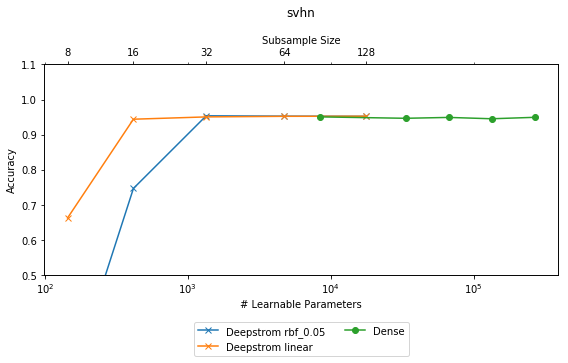

In [30]:
# lst_df_kernel = []
# kernel_names = set(df_deepstrom_grid["kernel"].values)
# nys_size = set(df_deepstrom_grid["--nys-size"].values)

# for k_name in kernel_names:
#     df_k = df_deepstrom_grid[df_deepstrom_grid["kernel"] == k_name]
#     df_k_sorted = get_sorted_acc_for_dataset(df_k, "mnist")
#     lst_df_kernel.append(df_k_sorted.iloc[0:1])

# df_deepstrom_grid_processed = pd.concat(lst_df_kernel)
                         
create_figure_from_df_deepstrom(df_deepstrom_grid, df_dense, "grid_search")

2019-01-14 12:49:31,947 [5823] DEBUG    root: Nystrom possible sizes are: {32, 64, 128, 8, 16}
2019-01-14 12:49:31,949 [5823] DEBUG    root: Kernel functions are: {'rbf', 'chi2_cpd', 'linear'}


--batch-size  --dropout --gamma  --learning-rate --nb-stack  --nys-size --out-dim  --real-fastfood  --seed  --tanh-activation       ...       deepfriedconvnet    kernel    network  test_acc  test_eval_time    train_time  training_time   val_acc  val_eval_time  file_timestamp
3            128        1.0     0.1           0.0001       None          16      None            False       0              False       ...                  False       rbf  deepstrom  0.955934        5.461280  10331.340425           None  0.948818       2.904871      1546888895
4            128        1.0    0.01           0.0001       None         128      None            False       0              False       ...                  False       rbf  deepstrom  0.958397       24.160543  35589.360986           None  0.951222      10.303744      1546901556
5            128        1.0    None           0.0001       None          64      None            False       0              False       ...                  False  chi2_cpd  deepstrom  0.959052        6.683464  11643.067578           None  0.952724       3.424270      1546872323
8            128        1.0    None           0.0001       None          64      None            False       0              False       ...                  False    linear  deepstrom  0.960899       19.890793  30285.921654           None  0.953626       8.645441      1546871217
9            128        1.0    None           0.0001       None          32      None            False       0              False       ...                  False  chi2_cpd  deepstrom  0.954126       18.052246  28334.161427           None  0.955929       7.939363      1546869469
10           128        1.0     0.1           0.0001       None         128      None            False       0              False       ...                  False       rbf  deepstrom  0.916564       22.530888  36388.595408           None  0.915465       9.922997      1546901812
14           128        1.0     1.0           0.0001       None          64      None            False       0              False       ...                  False       rbf  deepstrom  0.960630        6.689327  11333.091964           None  0.955429       3.374647      1546900611
15           128        1.0     1.0           0.0001       None          16      None            False       0              False       ...                  False       rbf  deepstrom  0.959244       15.812295  28163.243256           None  0.951623       7.331094      1546890774
16           128        1.0     1.0           0.0001       None          32      None            False       0              False       ...                  False       rbf  deepstrom  0.960784        6.318614  10157.971171           None  0.955529       3.223544      1546898356
18           128        1.0    0.01           0.0001       None          16      None            False       0              False       ...                  False       rbf  deepstrom  0.961977        5.679724  10372.074990           None  0.954527       3.128531      1546888529
20           128        1.0     0.1           0.0001       None          64      None            False       0              False       ...                  False       rbf  deepstrom  0.958667        6.654502  11347.596826           None  0.955529       3.359311      1546899262
21           128        1.0    None           0.0001       None          16      None            False       0              False       ...                  False    linear  deepstrom  0.957320        5.595378   9988.811031           None  0.951723       2.966331      1546858024
23           128        1.0    0.01           0.0001       None           8      None            False       0              False       ...                  False       rbf  deepstrom  0.930534        6.693204  17501.385925           None  0.929287       3.207332      1546887418
24           128        1.0    None           0.0001       None           8      Non

[0.95308651 0.95924415 0.96078356 0.96062962 0.96089901]
[0.78556034 0.95593442 0.95431804 0.95866687 0.91656404]
[0.93053417 0.9619766  0.95701201 0.95604988 0.95839748]
[0.94361915 0.96036022 0.95412562 0.95905172 0.96186115]
[0.94900708 0.95731989 0.95997537 0.96089901 0.95774323]


array([  8352,  33408,  66816, 133632, 267264])

array([0.95048491, 0.94644397, 0.94893781, 0.94509698, 0.9492072 ])

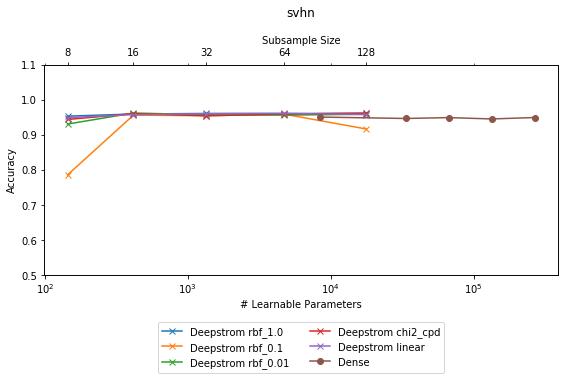

In [34]:
# lst_df_kernel = []
# kernel_names = set(df_deepstrom_grid["kernel"].values)
# nys_size = set(df_deepstrom_grid["--nys-size"].values)

# for k_name in kernel_names:
#     df_k = df_deepstrom_grid[df_deepstrom_grid["kernel"] == k_name]
#     df_k_sorted = get_sorted_acc_for_dataset(df_k, "mnist")
#     lst_df_kernel.append(df_k_sorted.iloc[0:1])

# df_deepstrom_grid_processed = pd.concat(lst_df_kernel)
def create_figure_from_df_deepstrom(df_deeps, df_dense, name_fig):
    kernel_names = set(df_deeps["kernel"].values)
    nys_size = set(df_deeps["--nys-size"].values)
    gamma_values = set(df_deeps["--gamma"].values)
    gamma_values.remove("None")

    logger.debug("Nystrom possible sizes are: {}".format(nys_size))
    logger.debug("Kernel functions are: {}".format(kernel_names))
    display(df_deeps)
    df_data = df_deeps
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        if k_name == "rbf":
            for g_val in gamma_values:
                k_name = "rbf" + "_" + str(g_val)
                df_rbf = df_kernel[df_kernel["--gamma"] == g_val]
                accuracies_kernel = df_rbf["test_acc"]
                subsample_sizes_kernel = df_rbf["--nys-size"].astype(int)
                np_param = (np.square(subsample_sizes_kernel) +  # m x m
                            subsample_sizes_kernel * nb_classes_dataset)  # m x c
                sorted_idx = np.argsort(np_param.values)
                xx = np_param.values[sorted_idx]
                print(accuracies_kernel.values[sorted_idx])
                yy = accuracies_kernel.values[sorted_idx].astype(float)
                ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
        else:
            accuracies_kernel = df_kernel["test_acc"]
            subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c
            sorted_idx = np.argsort(np_param.values)
            xx = np_param.values[sorted_idx]
            print(accuracies_kernel.values[sorted_idx])
            yy = accuracies_kernel.values[sorted_idx].astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")

    df_dense["--out-dim"] = df_dense["--out-dim"].astype(np.int)
    df_dense = df_dense.sort_values(by=["--out-dim"])
    accuracies_dense_mean = np.mean(
        np.array([list(df_dense[df_dense["--seed"] == seed_v]["test_acc"]) for seed_v in
                  range(5)]), axis=0)
    accuracies_dense_std = np.std(
        np.array([list(df_dense[df_dense["--seed"] == seed_v]["test_acc"]) for seed_v in
                  range(5)]), axis=0)
    
    out_dim_dense = np.array(sorted([int(n) for n in np.unique(df_dense["--out-dim"])]))
    np_param_dense = (nb_feature_conv * out_dim_dense +  # d x D
                out_dim_dense * nb_classes_dataset)  # D x c
    
    
#     display(accuracies_dense_mean)
#     display(np_param_dense)
    xx = np_param_dense
    display(xx)
    yy = accuracies_dense_mean.astype(float)
    display(yy)
    ax.plot(xx, yy, marker="o", label=f"Dense")

    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)


create_figure_from_df_deepstrom(df_deepstrom, df_dense, "normal")